In [50]:

"""
1. generate or load data
2. train linear regression with L2 loss
3. train linear regression with adaptive loss
4. train modal linear regression
5. check bias/variance trade-off
6. (optional) plot lines
"""
from data.synthetic import data1
from model.modal_lr import ModalLinearRegression
from model.adaptive_lr import AdaptiveRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
from prettytable import PrettyTable
plt.style.use('ggplot')


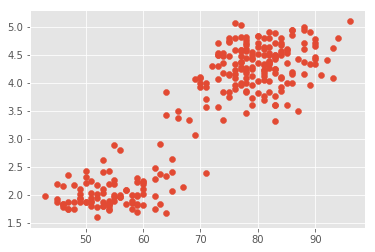

In [51]:
my_data = np.genfromtxt('faithful.csv', delimiter=',')
data = my_data[1:,1:]
plt.scatter(data[:,1], data[:,0])
x, y = data[:,1], data[:,0]
n = x.shape[0]

In [52]:
x, y = np.load('data/q3_train_X.npy'), np.load('data/q3_train_y.npy')
n = x.shape[0]

Fit with the EM algorithm






  0%|          | 0/500 [00:00<?, ?it/s]



  0%|          | 1/500 [00:00<03:46,  2.20it/s]



  0%|          | 2/500 [00:00<03:18,  2.51it/s]



  1%|          | 3/500 [00:01<03:37,  2.29it/s]



  1%|          | 5/500 [00:01<02:43,  3.03it/s]



  1%|          | 6/500 [00:01<02:10,  3.78it/s]



  1%|▏         | 7/500 [00:01<01:56,  4.24it/s]



  2%|▏         | 10/500 [00:01<01:26,  5.68it/s]



  3%|▎         | 13/500 [00:01<01:04,  7.50it/s]



  3%|▎         | 16/500 [00:02<00:50,  9.58it/s]



  4%|▍         | 20/500 [00:02<00:39, 12.24it/s]



  5%|▍         | 23/500 [00:02<00:38, 12.39it/s]



  5%|▌         | 26/500 [00:02<00:47, 10.03it/s]



  6%|▌         | 28/500 [00:03<00:49,  9.59it/s]



  6%|▌         | 30/500 [00:03<01:14,  6.35it/s]



  7%|▋         | 33/500 [00:03<01:02,  7.50it/s]



  7%|▋         | 35/500 [00:03<00:50,  9.22it/s]



  7%|▋         | 37/500 [00:04<00:45, 10.25it/s]



  8%|▊         | 39/500 [00:04<00:41, 11.02it/s]



  8%|▊         | 42/500

 85%|████████▍ | 424/500 [00:38<00:03, 20.22it/s]



 86%|████████▌ | 429/500 [00:38<00:02, 24.62it/s]



 87%|████████▋ | 433/500 [00:38<00:02, 23.76it/s]



 87%|████████▋ | 437/500 [00:38<00:02, 26.47it/s]



 88%|████████▊ | 441/500 [00:39<00:06,  9.82it/s]



 89%|████████▉ | 444/500 [00:40<00:07,  7.54it/s]



 89%|████████▉ | 446/500 [00:40<00:06,  8.35it/s]



 90%|████████▉ | 448/500 [00:40<00:06,  8.36it/s]



 91%|█████████ | 454/500 [00:40<00:04, 11.20it/s]



 91%|█████████▏| 457/500 [00:42<00:07,  5.69it/s]



 92%|█████████▏| 459/500 [00:42<00:08,  4.83it/s]



 92%|█████████▏| 461/500 [00:43<00:08,  4.56it/s]



 93%|█████████▎| 463/500 [00:43<00:08,  4.23it/s]



 93%|█████████▎| 464/500 [00:43<00:08,  4.10it/s]



 93%|█████████▎| 466/500 [00:44<00:06,  5.29it/s]



 94%|█████████▎| 468/500 [00:44<00:07,  4.42it/s]



 94%|█████████▍| 469/500 [00:44<00:06,  4.83it/s]



 94%|█████████▍| 471/500 [00:45<00:06,  4.74it/s]



 95%|█████████▍| 474/500 [00:45<00:04,  6.33it

+---------------------+---------+
|        Model        |   MSE   |
+---------------------+---------+
|  Linear Regression  |  76.043 |
|   Modal Regression  | 123.327 |
| Adaptive Regression |  82.539 |
+---------------------+---------+


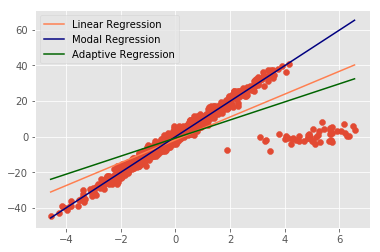

In [53]:
with open("config.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)
# step 1
#n = cfg['data']['n']
#x, y, u = data1(n=n)
x = x.reshape(n, -1)

# step 2
lr = LinearRegression()
lr.fit(x, y)

# step 3
ml = ModalLinearRegression(bandwidth=10, maxitr=500)  # seems very important to calibrate bandwidth
ml.fit(x, y)

# step 4
ada_lr = AdaptiveRegression()
ada_lr.fit(x, y)

# step 5
table = PrettyTable()
table.field_names = ["Model", "MSE"]
mse_lr = np.mean((y.flatten() - lr.predict(x))**2)
mse_lr = int(mse_lr * 1000) / 1000
mse_ml = np.mean((y.flatten() - ml.predict(x))**2)
mse_ml = int(mse_ml * 1000) / 1000
mse_alr = np.mean((y.flatten() - ada_lr.predict(x))**2)
mse_alr = int(mse_alr * 1000) / 1000

table.add_row(["Linear Regression", mse_lr])
table.add_row(["Modal Regression", mse_ml])
table.add_row(["Adaptive Regression", mse_alr])
print(table)

# step 6
if cfg['plot']:
    plt.scatter(x.flatten(), y)
    x_plot = np.linspace(np.min(x), np.max(x), 100)  # hacky (I know the range of X is [0,1])
    y_plot_ml = ml.predict(x_plot.reshape(100, 1))
    y_plot_alr = ada_lr.predict(x_plot.reshape(100, 1))
    y_plot_lr = lr.predict(x_plot.reshape(100, 1))
    plt.plot(x_plot, y_plot_lr, color='coral', label='Linear Regression')
    plt.plot(x_plot, y_plot_ml, color='navy', label='Modal Regression')
    plt.plot(x_plot, y_plot_alr, color='darkgreen', label='Adaptive Regression')
    plt.legend()
    # plt.savefig('fig/comparison.png')
    plt.show()


Regression clustering

In [45]:
## from https://stackoverflow.com/questions/39208679/libraries-for-regression-clustering-in-python

import numpy as np
from sklearn.linear_model import Ridge
from sklearn.base import RegressorMixin, BaseEstimator, clone

class ClusteredRegressor(RegressorMixin, BaseEstimator):
    def __init__(self, n_components=2, base=Ridge(), random_state=1, max_iter=100, tol=1e-10, verbose=False):
        self.n_components = n_components
        self.base = base
        self.random_state = random_state
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.estimators_ = [clone(self.base) for i in range(self.n_components)]
        # initialize cluster responsibilities randomly
        self.resp_ = np.random.uniform(size=(X.shape[0], self.n_components))
        self.resp_ /= self.resp_.sum(axis=1, keepdims=True)
        for it in range(self.max_iter):
            old_resp = self.resp_.copy()
            # Estimate sample-weithted regressions
            errors = np.empty(shape=self.resp_.shape)
            for i, est in enumerate(self.estimators_):
                est.fit(X, y, sample_weight=self.resp_[:, i])
                errors[:, i] = y - est.predict(X)
            self.mse_ = np.sum(self.resp_ * errors**2) / X.shape[0]
            if self.verbose:
                print(self.mse_)
            # Recalculate responsibilities
            self.resp_ = np.exp(-errors**2 / self.mse_)
            self.resp_ /= self.resp_.sum(axis=1, keepdims=True)
            # stop if change in responsibilites is small
            delta = np.abs(self.resp_ - old_resp).mean()
            if delta < self.tol:
                break
        self.n_iter_ = it
        return self

    def predict(self, X):
        """ Calculate a matrix of conditional predictions """
        return np.vstack([est.predict(X) for est in self.estimators_]).T

    def predict_proba(self, X, y):
        """ Estimate cluster probabilities of labeled data """
        predictions = self.predict(X)
        errors = np.empty(shape=self.resp_.shape)
        for i, est in enumerate(self.estimators_):
            errors[:, i] = y - est.predict(X)
        resp_ = np.exp(-errors**2 / self.mse_)
        resp_ /= resp_.sum(axis=1, keepdims=True)
        return resp

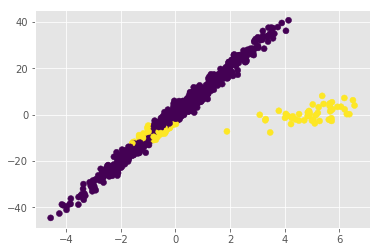

In [47]:
with open("config.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)
x, y = np.load('data/q3_train_X.npy'), np.load('data/q3_train_y.npy')
n = x.shape[0]
model = ClusteredRegressor()
model.fit(x, y)
labels = np.argmax(model.resp_, axis=1)
plt.scatter(x, y, c=labels)
plt.show()